<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/elasticities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture 
!pip install jaxopt

In [9]:
import jax 
import jax.numpy as jnp 
import jaxopt 
from functools import partial

In [10]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [11]:
def demand(p : float) -> float:
    return 10.0 - 2.*jnp.sqrt(p) 

def elasticity(f: callable, p: float):
  q = f(p)   
  return (p/q) * jax.grad(f)(p)

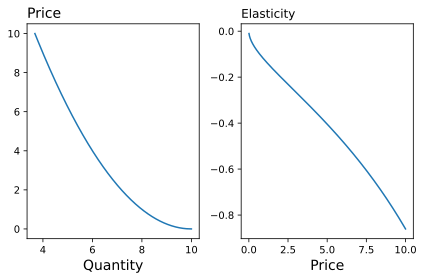

In [17]:
fig, (ax1, ax2) = plt.subplots(dpi=300, tight_layout=True, nrows=1, ncols=2)
ps = jnp.linspace(0, 10, 1000)
qs = jax.vmap(demand)(ps)
elasticities = jax.vmap(partial(elasticity, demand))(ps)
ax1.plot(qs, ps)
ax1.set_title('Price', loc='left', size=14)
ax1.set_xlabel('Quantity', size=14)
ax2.plot(ps, elasticities)
ax2.set_title('Elasticity', loc='left')
ax2.set_xlabel('Price', size=14)
fig.savefig('elasticity.png', format='png')
plt.show()

In [ ]:
def inverse_fn(f: callable, x: float, init_param=5.0): 
    loss_fn = lambda z: (f(z)-x)**2
    solver = jaxopt.GradientDescent(fun=loss_fn)
    return solver.run(init_param).params



In [ ]:
def elasticity(Price: bool, f: callable, x: float):
    if Price:
        q, p = f(x), x
    else:
        q, p = x, inverse_fn(f, x)        
    return (p/q) * jax.grad(f)(p)

price = 3.0 
quantity = demand(3.0)
print(elasticity(True, demand, price))
print(elasticity(False, demand, quantity))